In [1]:
### calling packages

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

import time
from datetime import datetime

In [2]:
# pd.set_option('display.max_rows', None)

### 0. 통일성을 위한 공통 작업

In [3]:
### matplotlib, seaborn 한글 깨짐 현상 해결

from matplotlib import font_manager, rc # matplotlib, seaborn에서 한글 깨짐 현상을 해결하기 위함

font_path = "C:/WINDOWS/FONTS/MALGUNSL.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [4]:
### 색상 통일

col=['#6B4E24','#EECA98','#EBAA4F','#6B5B45','#B8853E','#AB891A','#6B5610','#EBBC23','#F7B50F']

### 4. 기간별 시간평균 데이터를 통해 일변화 경향성을 살펴보자!

In [ ]:
### '서울시 기간별 시간평균 대기환경 정보.csv'를 ATM_daily_df라는 데이터프레임 형태로 불러오기

ATM_hourly_df = pd.read_csv('C:/Users/izzle/Downloads/서울시 기간별 시간평균 대기환경 정보.csv', encoding='cp949')
ATM_hourly_df.head(10)

,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,2023/01/14 00:00,100.0,도심권,111121.0,중구,0.0,0.0,0.0,0.000,0.000,0.0,0.000
1,2023/01/14 00:00,100.0,도심권,111131.0,용산구,17.0,19.0,12.0,0.002,0.035,0.7,0.003
2,2023/01/14 00:00,100.0,도심권,111123.0,종로구,19.0,19.0,15.0,0.002,0.042,1.0,0.005
3,2023/01/14 00:00,101.0,서북권,111181.0,은평구,20.0,19.0,17.0,0.001,0.031,1.3,0.004
4,2023/01/14 00:00,101.0,서북권,111191.0,서대문구,19.0,18.0,12.0,0.001,0.039,1.1,0.003
5,2023/01/14 00:00,101.0,서북권,111201.0,마포구,15.0,19.0,11.0,0.002,0.038,0.8,0.005
6,2023/01/14 00:00,102.0,동북권,111311.0,노원구,30.0,27.0,0.0,0.002,0.043,0.9,0.004
7,2023/01/14 00:00,102.0,동북권,111151.0,중랑구,13.0,16.0,9.0,0.002,0.041,0.8,0.003
8,2023/01/14 00:00,102.0,동북권,111291.0,강북구,21.0,17.0,12.0,0.002,0.040,1.2,0.004
9,2023/01/14 00:00,102.0,동북권,111142.0,성동구,14.0,20.0,9.0,0.002,0.036,0.7,0.004


In [ ]:
### 광진구 자료만 추출하기

gwangjin_hourly = ATM_hourly_df[ATM_hourly_df['측정소명'] == '광진구']
gwangjin_hourly.head(10)

,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
13,2023/01/14 00:00,102.0,동북권,111141.0,광진구,9.0,12.0,5.0,0.002,0.027,0.6,0.004
36,2023/01/13 23:00,102.0,동북권,111141.0,광진구,13.0,11.0,8.0,0.002,0.027,0.6,0.004
57,2023/01/13 22:00,102.0,동북권,111141.0,광진구,13.0,11.0,8.0,0.002,0.028,0.7,0.004
84,2023/01/13 21:00,102.0,동북권,111141.0,광진구,11.0,10.0,8.0,0.002,0.028,0.7,0.004
110,2023/01/13 20:00,102.0,동북권,111141.0,광진구,9.0,10.0,5.0,0.002,0.029,0.6,0.004
138,2023/01/13 19:00,102.0,동북권,111141.0,광진구,12.0,11.0,6.0,0.002,0.029,0.7,0.004
156,2023/01/13 18:00,102.0,동북권,111141.0,광진구,9.0,11.0,5.0,0.002,0.029,0.7,0.004
187,2023/01/13 17:00,102.0,동북권,111141.0,광진구,12.0,12.0,6.0,0.002,0.030,0.6,0.004
212,2023/01/13 16:00,102.0,동북권,111141.0,광진구,13.0,12.0,6.0,0.002,0.029,0.6,0.004
237,2023/01/13 15:00,102.0,동북권,111141.0,광진구,12.0,12.0,6.0,0.003,0.030,0.7,0.004


In [ ]:
### 데이터 타입

gwangjin_hourly.dtypes

측정일시               object
권역코드              float64
권역명                object
측정소코드             float64
측정소명               object
미세먼지 1시간(㎍/㎥)     float64
미세먼지 24시간(㎍/㎥)    float64
초미세먼지(㎍/㎥)        float64
오존(ppm)           float64
이산화질소농도(ppm)      float64
일산화탄소농도(ppm)      float64
아황산가스농도(ppm)      float64
dtype: object

In [ ]:
### 결측치 확인

gwangjin_hourly.isnull().sum()

측정일시              0
권역코드              0
권역명               0
측정소코드             0
측정소명              0
미세먼지 1시간(㎍/㎥)     0
미세먼지 24시간(㎍/㎥)    0
초미세먼지(㎍/㎥)        0
오존(ppm)           0
이산화질소농도(ppm)      0
일산화탄소농도(ppm)      0
아황산가스농도(ppm)      0
dtype: int64

In [ ]:
### datetime 적용하기

gwangjin_hourly['측정일시2'] = pd.to_datetime(gwangjin_hourly['측정일시'], format = '%Y/%m/%d %H:%M')
gwangjin_hourly

C:\Users\izzle\AppData\Local\Temp\ipykernel_1512\287026926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwangjin_hourly['측정일시2'] = pd.to_datetime(gwangjin_hourly['측정일시'], format = '%Y/%m/%d %H:%M')


,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),측정일시2
13,2023/01/14 00:00,102.0,동북권,111141.0,광진구,9.0,12.0,5.0,0.002,0.027,0.6,0.004,2023-01-14 00:00:00
36,2023/01/13 23:00,102.0,동북권,111141.0,광진구,13.0,11.0,8.0,0.002,0.027,0.6,0.004,2023-01-13 23:00:00
57,2023/01/13 22:00,102.0,동북권,111141.0,광진구,13.0,11.0,8.0,0.002,0.028,0.7,0.004,2023-01-13 22:00:00
84,2023/01/13 21:00,102.0,동북권,111141.0,광진구,11.0,10.0,8.0,0.002,0.028,0.7,0.004,2023-01-13 21:00:00
110,2023/01/13 20:00,102.0,동북권,111141.0,광진구,9.0,10.0,5.0,0.002,0.029,0.6,0.004,2023-01-13 20:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36507,2022/11/14 04:00,102.0,동북권,111141.0,광진구,19.0,18.0,13.0,0.002,0.017,0.9,0.002,2022-11-14 04:00:00
36534,2022/11/14 03:00,102.0,동북권,111141.0,광진구,16.0,19.0,13.0,0.002,0.018,0.9,0.002,2022-11-14 03:00:00
36563,2022/11/14 02:00,102.0,동북권,111141.0,광진구,18.0,19.0,14.0,0.003,0.018,0.8,0.002,2022-11-14 02:00:00
36588,2022/11/14 01:00,102.0,동북권,111141.0,광진구,19.0,19.0,14.0,0.002,0.017,0.9,0.002,2022-11-14 01:00:00


In [ ]:
### 시간 컬럼 분리하기

gwangjin_hourly['시간'] = gwangjin_hourly['측정일시2'].dt.time
gwangjin_hourly

C:\Users\izzle\AppData\Local\Temp\ipykernel_1512\462641474.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwangjin_hourly['시간'] = gwangjin_hourly['측정일시2'].dt.time


,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),측정일시2,시간
13,2023/01/14 00:00,102.0,동북권,111141.0,광진구,9.0,12.0,5.0,0.002,0.027,0.6,0.004,2023-01-14 00:00:00,00:00:00
36,2023/01/13 23:00,102.0,동북권,111141.0,광진구,13.0,11.0,8.0,0.002,0.027,0.6,0.004,2023-01-13 23:00:00,23:00:00
57,2023/01/13 22:00,102.0,동북권,111141.0,광진구,13.0,11.0,8.0,0.002,0.028,0.7,0.004,2023-01-13 22:00:00,22:00:00
84,2023/01/13 21:00,102.0,동북권,111141.0,광진구,11.0,10.0,8.0,0.002,0.028,0.7,0.004,2023-01-13 21:00:00,21:00:00
110,2023/01/13 20:00,102.0,동북권,111141.0,광진구,9.0,10.0,5.0,0.002,0.029,0.6,0.004,2023-01-13 20:00:00,20:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36507,2022/11/14 04:00,102.0,동북권,111141.0,광진구,19.0,18.0,13.0,0.002,0.017,0.9,0.002,2022-11-14 04:00:00,04:00:00
36534,2022/11/14 03:00,102.0,동북권,111141.0,광진구,16.0,19.0,13.0,0.002,0.018,0.9,0.002,2022-11-14 03:00:00,03:00:00
36563,2022/11/14 02:00,102.0,동북권,111141.0,광진구,18.0,19.0,14.0,0.003,0.018,0.8,0.002,2022-11-14 02:00:00,02:00:00
36588,2022/11/14 01:00,102.0,동북권,111141.0,광진구,19.0,19.0,14.0,0.002,0.017,0.9,0.002,2022-11-14 01:00:00,01:00:00


In [ ]:
### 데이터 타입 재확인

gwangjin_hourly.dtypes

측정일시                      object
권역코드                     float64
권역명                       object
측정소코드                    float64
측정소명                      object
미세먼지 1시간(㎍/㎥)            float64
미세먼지 24시간(㎍/㎥)           float64
초미세먼지(㎍/㎥)               float64
오존(ppm)                  float64
이산화질소농도(ppm)             float64
일산화탄소농도(ppm)             float64
아황산가스농도(ppm)             float64
측정일시2             datetime64[ns]
시간                        object
dtype: object

In [ ]:
### '시간만' 추출

gwangjin_hourly['time'] = gwangjin_hourly.apply(lambda row: int(str(row['시간'])[:2]), axis=1)
gwangjin_hourly

C:\Users\izzle\AppData\Local\Temp\ipykernel_1512\2819527824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwangjin_hourly['time'] = gwangjin_hourly.apply(lambda row: int(str(row['시간'])[:2]), axis=1)


,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),측정일시2,시간,time
13,2023/01/14 00:00,102.0,동북권,111141.0,광진구,9.0,12.0,5.0,0.002,0.027,0.6,0.004,2023-01-14 00:00:00,00:00:00,0
36,2023/01/13 23:00,102.0,동북권,111141.0,광진구,13.0,11.0,8.0,0.002,0.027,0.6,0.004,2023-01-13 23:00:00,23:00:00,23
57,2023/01/13 22:00,102.0,동북권,111141.0,광진구,13.0,11.0,8.0,0.002,0.028,0.7,0.004,2023-01-13 22:00:00,22:00:00,22
84,2023/01/13 21:00,102.0,동북권,111141.0,광진구,11.0,10.0,8.0,0.002,0.028,0.7,0.004,2023-01-13 21:00:00,21:00:00,21
110,2023/01/13 20:00,102.0,동북권,111141.0,광진구,9.0,10.0,5.0,0.002,0.029,0.6,0.004,2023-01-13 20:00:00,20:00:00,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36507,2022/11/14 04:00,102.0,동북권,111141.0,광진구,19.0,18.0,13.0,0.002,0.017,0.9,0.002,2022-11-14 04:00:00,04:00:00,4
36534,2022/11/14 03:00,102.0,동북권,111141.0,광진구,16.0,19.0,13.0,0.002,0.018,0.9,0.002,2022-11-14 03:00:00,03:00:00,3
36563,2022/11/14 02:00,102.0,동북권,111141.0,광진구,18.0,19.0,14.0,0.003,0.018,0.8,0.002,2022-11-14 02:00:00,02:00:00,2
36588,2022/11/14 01:00,102.0,동북권,111141.0,광진구,19.0,19.0,14.0,0.002,0.017,0.9,0.002,2022-11-14 01:00:00,01:00:00,1


In [ ]:
### 데이터 처리

mean_NO2_by_hour = gwangjin_hourly.groupby('time')['이산화질소농도(ppm)'].mean()
mean_O3_by_hour = gwangjin_hourly.groupby('time')['오존(ppm)'].mean()
mean_PM10_by_hour = gwangjin_hourly.groupby('time')['미세먼지 1시간(㎍/㎥)'].mean()
mean_PM25_by_hour = gwangjin_hourly.groupby('time')['초미세먼지(㎍/㎥)'].mean()

Text(0.5, 1.0, '광진구 이산화질소, 오존 농도 시간별 평균 그래프')

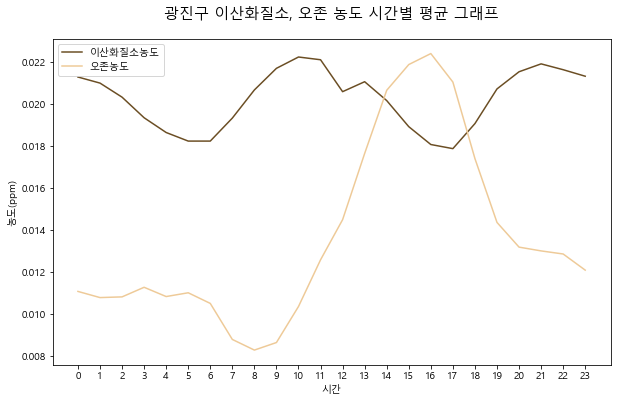

In [ ]:
### 이산화질소, 오존 농도 시간별 평균 그래프

plt.figure(figsize = (10, 6))
plt.plot(mean_NO2_by_hour, color = '#6B4E24', label = '이산화질소농도')
plt.plot(mean_O3_by_hour, color = '#EECA98', label = '오존농도')
plt.xticks(np.arange(0, 24))
plt.xlabel('시간')
plt.ylabel('농도(ppm)')
plt.legend()
plt.title('광진구 이산화질소, 오존 농도 시간별 평균 그래프', fontsize = 15, pad = 20)

# plt.savefig('광진구 이산화질소, 오존 농도 시간별 평균.png', facecolor = 'white', bbox_inches='tight', pad_inches=0.5)

Text(0.5, 1.0, '광진구 미세먼지, 초미세먼지 농도 시간별 평균 그래프')

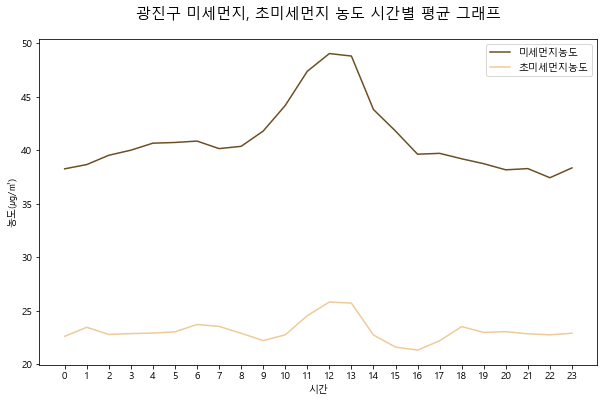

In [ ]:
### 미세먼지, 초미세먼지 농도 시간별 평균 그래프

plt.figure(figsize = (10, 6))
plt.plot(mean_PM10_by_hour, color = '#6B4E24', label = '미세먼지농도')
plt.plot(mean_PM25_by_hour, color = '#EECA98', label = '초미세먼지농도')
plt.xticks(np.arange(0, 24))
plt.xlabel('시간')
plt.ylabel('농도(㎍/㎥)')
plt.legend()
plt.title('광진구 미세먼지, 초미세먼지 농도 시간별 평균 그래프', fontsize = 15, pad = 20)

# plt.savefig('광진구 미세먼지, 초미세먼지 농도 시간별 평균.png', facecolor = 'white', bbox_inches='tight', pad_inches=0.5)